# Import data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (54000, 28, 28), Validation: (6000, 28, 28), Test: (10000, 28, 28)


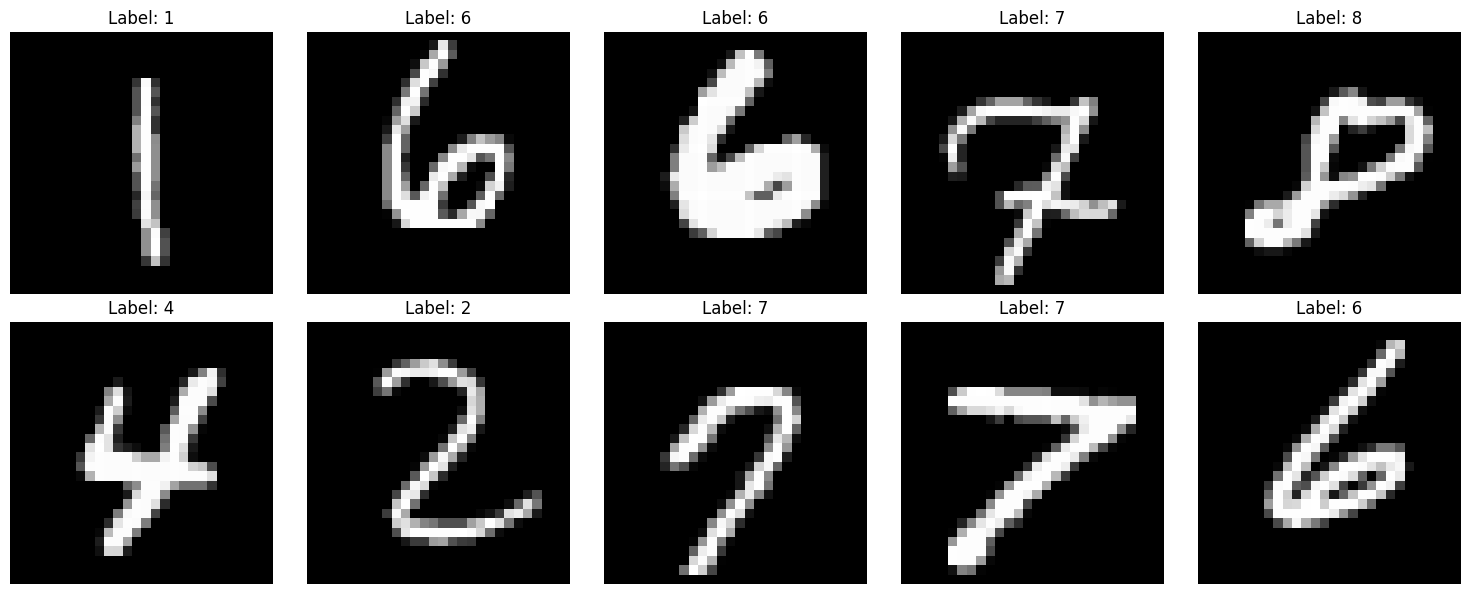

In [4]:
# Print 10 images
plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Train and test models

## Random Forest

In [5]:
X_test = X_test.reshape(X_test.shape[0], -1) 
X_train = X_train.reshape(X_train.shape[0], -1)  
X_val = X_val.reshape(X_val.shape[0], -1)  

In [6]:
from wrapper.mnist_classifier import MnistClassifier
from schemas.hyperparameter_validation import RFParams

In [21]:
def pretty_eval(eval):
    print("Test metrics:\n")
    for field, value in eval.model_dump().items():
        if value is not None:
            if isinstance(value, np.ndarray):
                print(f"{field}:\n{value}")
            else:
                print(f"{field}: {value:.4f}" if isinstance(value, float) else f"{field}: {value}")

def print_misclassified(X_test, y_pred, y_test):
    misclassified_idx = np.where(y_pred != y_test)[0]

    np.random.seed(42)
    sample_idx = np.random.choice(misclassified_idx, size=9, replace=False)

    plt.figure(figsize=(5, 5))
    for i, idx in enumerate(sample_idx):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True: {y_test[idx]} / Pred: {y_pred[idx]}")
        plt.axis("off")

    plt.suptitle("Misclassified MNIST examples", fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:
hyperparams = RFParams(n_estimators=100,
                       random_state=42,
                       verbose=0)

rf_classifier = MnistClassifier(algorithm="rf", 
                                hyperparams=hyperparams)

rf_classifier.train(X_train=X_train,
                    y_train=y_train,
                    X_val=X_val,
                    y_val=y_val)
print("\n\n")
eval, y_pred = rf_classifier.evaluate(X_test, y_test)
pretty_eval(eval=eval)

Validation metrics:

accuracy: 0.9727
precision: 0.9726
recall: 0.9724
f1_score: 0.9725
confusion_matrix: 
[[614   0   1   0   1   2   4   0   1   1]
 [  0 650   2   1   1   0   0   0   0   0]
 [  2   1 559   2   1   0   1   4   1   1]
 [  1   0   7 571   0   3   0   2   3   2]
 [  2   0   1   0 560   0   1   3   0  13]
 [  4   1   1   5   2 530   2   1   4   1]
 [  4   0   0   0   2   2 570   0   2   0]
 [  0   7   7   0   3   0   0 611   2   3]
 [  1   2   6   5   4   3   0   0 562   2]
 [  2   0   1   5   4   2   0   4   5 609]]



Test metrics:

accuracy: 0.9693
precision: 0.9692
recall: 0.9690
f1_score: 0.9690
confusion_matrix:
[[ 970    0    1    0    0    1    2    1    5    0]
 [   0 1124    2    3    1    2    2    0    1    0]
 [   5    0 1002    5    1    0    4    8    7    0]
 [   1    0   12  972    0    6    0    9    7    3]
 [   1    0    1    0  957    0    7    0    3   13]
 [   4    0    0   13    4  855    6    2    5    3]
 [   5    3    1    0    5    4  937    0

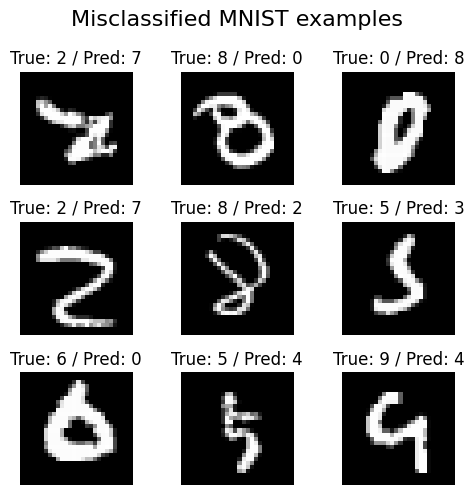

In [22]:
print_misclassified(X_test, y_pred, y_test)

In [18]:
# test with different hyperparams

hyperparams2 = RFParams(n_estimators=200,
                        random_state=42,
                        verbose=0)

rf_classifier2 = MnistClassifier(algorithm="rf", 
                                 hyperparams=hyperparams2)

rf_classifier2.train(X_train=X_train,
                     y_train=y_train,
                     X_val=X_val,
                     y_val=y_val)
print("\n\n")
eval2, y_pred2 = rf_classifier2.evaluate(X_test, y_test)
pretty_eval(eval=eval2)

Validation metrics:

accuracy: 0.9733
precision: 0.9732
recall: 0.9731
f1_score: 0.9731
confusion_matrix: 
[[614   0   1   0   1   2   3   0   2   1]
 [  0 649   2   2   0   0   0   0   0   1]
 [  0   1 557   3   3   0   2   4   1   1]
 [  1   0   5 571   0   5   0   2   3   2]
 [  2   0   1   0 561   0   0   3   0  13]
 [  4   1   0   6   1 531   3   0   4   1]
 [  4   0   0   0   2   3 569   0   2   0]
 [  1   6   6   0   4   0   0 612   2   2]
 [  1   2   6   5   4   2   0   0 565   0]
 [  3   0   1   4   4   2   0   3   4 611]]



Test metrics:

accuracy: 0.9698
precision: 0.9696
recall: 0.9695
f1_score: 0.9695
confusion_matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1124    1    4    0    2    2    0    1    1]
 [   5    0 1001    7    1    0    4    8    6    0]
 [   1    0    9  970    0    7    0    9    9    5]
 [   1    0    0    0  960    0    5    0    3   13]
 [   3    0    0   14    3  857    6    2    5    2]
 [   5    3    1    0    4    5  936    0

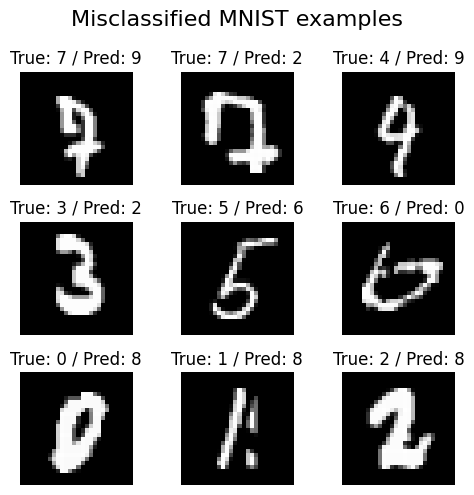

In [23]:
print_misclassified(X_test, y_pred2, y_test)

### Optional: find the best hyperparams using RandomizedSearchCV

This section performs hyperparameter tuning on the full X_train set using `RandomizedSearchCV`. 

- Distributions for hyperparameters such as `n_estimators`, and `max_depth` are defined.
- `RandomizedSearchCV` randomly selects combinations from these distributions and evaluates each using 3-fold cross-validation.
- Execution can require **several minutes to an hour** (ran ~7m on my machine) on typical CPUs, as the full training set (54,000 images) is utilized.

> For demonstration purposes, the results from a previous execution are displayed below. Re-execution of this cell is possible, but prolonged runtime is expected.

<details>
<summary>Click here to see results</summary>

Best hyperparameters: {'max_depth': 19, 'n_estimators': 156}  
Best CV score: 0.9648148148148148

Validation metrics:  

Accuracy: 0.9715  
Precision: 0.9715614790042484  
Recall: 0.9715  
F1 score: 0.9714934646812761  


Test metrics:  

Accuracy: 0.9693  
Precision: 0.9693093241546203  
Recall: 0.9693  
F1 score: 0.9692845248397367  
</details> 

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(5, 20)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,     
    cv=3,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

accuracy=accuracy_score(y_val, y_val_pred)
precision=precision_score(y_val, y_val_pred, average='weighted')
recall=recall_score(y_val, y_val_pred, average='weighted')
f1=f1_score(y_val, y_val_pred, average='weighted')
print("\nValidation metrics:")
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 score: {f1}")

print("\n")
y_test_pred = best_rf.predict(X_test)

accuracy=accuracy_score(y_test, y_test_pred)
precision=precision_score(y_test, y_test_pred, average='weighted')
recall=recall_score(y_test, y_test_pred, average='weighted')
f1=f1_score(y_test, y_test_pred, average='weighted')
print("Test metrics:\n")
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 score: {f1}")

Best hyperparameters: {'max_depth': 19, 'n_estimators': 156}
Best CV score: 0.9648148148148148

Validation metrics:
Accuracy: 0.9715
Precision: 0.9715614790042484
Recall0.9715
F1 score: 0.9714934646812761


Test metrics:

Accuracy: 0.9693
Precision: 0.9693093241546203
Recall0.9693
F1 score: 0.9692845248397367


### Key observations

- Accuracy consistently remained in the **~96–97% range** across all runs.  
- Increasing the number of estimators or performing hyperparameter tuning led to only **marginal gains**.  
- Confusion matrices showed typical MNIST misclassifications (such as visually similar digits), without dramatic shifts across settings.  
- Overall, Random Forest provided strong baseline performance on MNIST, though further improvements would likely require neural models (feed-forward or CNN).  